# HOMEWORK I

## Classification task

### Preparing the working environment

#### Libraries used

In [1]:
from collections import Counter
from statistics import mean

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn import neighbors, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             balanced_accuracy_score, confusion_matrix,
                             f1_score)
from sklearn.model_selection import (GridSearchCV, ShuffleSplit,
                                     StratifiedKFold, cross_val_score,
                                     train_test_split)

#### Loading the dataset

In [2]:
dataset = pd.read_csv("train_set.tsv", sep='\t', header=0)
random_state = 2057231

X = dataset.iloc[:,:-2]
yC = dataset.iloc[:,-2]

X = X.to_numpy()

#### Plotting the dataset

In [3]:
target_names = ['class zero','class one','class two','class tre', 'class four']

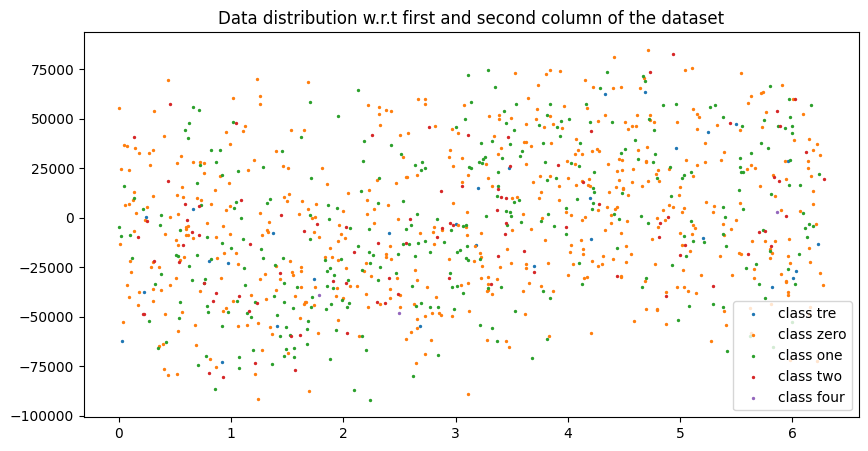

In [4]:
counter = Counter(yC)
i= np.arange(len(target_names))

plt.figure(1, figsize=(10,5))
for i, _ in counter.items():
    row = np.where (yC == i)[0]
    plt.scatter(X[row,0], X[row,1], 2, label=target_names[i])
plt.legend()
plt.title('Data distribution w.r.t first and second column of the dataset')

plt.show()

0    538
1    333
2     96
3     30
4      3
Name: num_collisions, dtype: int64


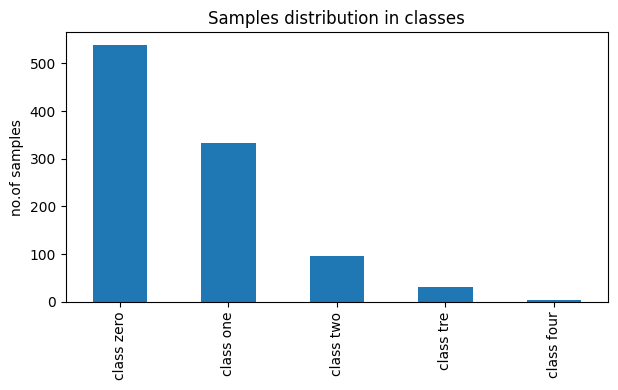

In [6]:
plt.figure(figsize=(7,3.5))
yC.value_counts().sort_index().plot(kind='bar')
plt.xticks([0,1,2,3,4], target_names)
plt.ylabel('no.of samples')
plt.title('Samples distribution in classes')
print(yC.value_counts())

plt.show()

### Random Forest Classifier

#### K-Fold CrossValidation

In [45]:
model = RandomForestClassifier(random_state = random_state, n_jobs=-1)
skf = StratifiedKFold(n_splits=10, random_state=random_state, shuffle=True)
lst_f1_stratified = []
lst_accu_stratified = []
for train_index, test_index in skf.split(X, yC): 
    X_train_fold, X_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = yC[train_index], yC[test_index] 
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)
    lst_f1_stratified.append(f1_score(y_test_fold, y_pred, average='macro', zero_division=0))
    lst_accu_stratified.append(balanced_accuracy_score(y_test_fold, y_pred))
print('Overall f1-score:', mean(lst_f1_stratified))
print('Overall balanced accuracy:', mean(lst_accu_stratified))

c:\Users\gianc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Overall f1-score: 0.20017394045788178
Overall balanced accuracy: 0.2373571078898493


#### Splitting the dataset 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, yC, test_size = 0.2, random_state = random_state, stratify=yC)

# Stratify will make sure your train and validation data are split based on output label frequencies based on train data

#### Balancing the train split subset

In [29]:
# Oversampling the training subset

class4 ={yC.value_counts().sort_index().index[4]:6}
#         yC.value_counts().sort_index().index[3]:334,
#        yC.value_counts().sort_index().index[2]:334}

ros = SMOTE(random_state=random_state, sampling_strategy=class4, k_neighbors=1)
X_res, y_res = ros.fit_resample(X_train, y_train)

smote = SMOTE(random_state = random_state)

X_train_b, y_train_b = smote.fit_resample(X_res, y_res)

# SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and 
# drawing a new sample as a point along that line.

##### Plotting the new balanced samples distribution in train-set split

0    431
1    431
2    431
3    431
4    431
Name: num_collisions, dtype: int64


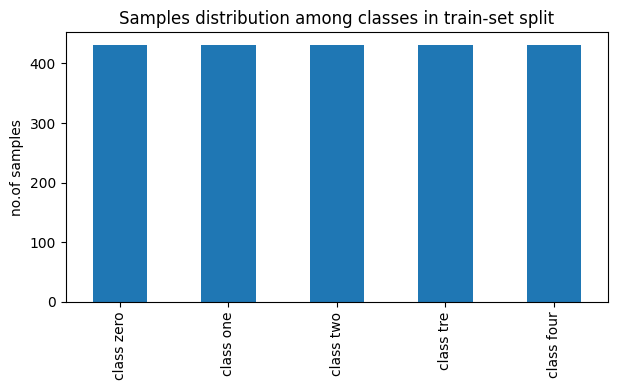

In [8]:
plt.figure(figsize=(7,3.5))
y_train_b.value_counts().sort_index().plot(kind='bar')
plt.xticks([0,1,2,3,4], target_names)
plt.ylabel('no.of samples')
plt.title('Samples distribution among classes in train-set split')
print(y_train_b.value_counts())

plt.show()

#### Random Forest Algorithm

In [30]:
# Random Forest

model = RandomForestClassifier(n_estimators=200, max_depth=None, criterion='gini', random_state = random_state, n_jobs=-1)
model.fit(X_train_b, y_train_b)
y_pred = model.predict(X_test)

print(f"Accuracy score on balanced: {accuracy_score(y_test, y_pred):.3f}")

model1 = RandomForestClassifier(random_state = random_state, n_jobs=-1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print(f"\nBalanced Accuracy score on non-balanced: {balanced_accuracy_score(y_test, y_pred1):.3f}")

Accuracy score on balanced: 0.475

Balanced Accuracy score on non-balanced: 0.212


##### Evaluations

In [11]:
# More evaluations

results = f1_score(y_test, y_pred, average=None, zero_division=0)
print("\nf1-scores on balanced:\n")
i=0
for i in range(len(results)):
    print('f1-score for class %d: %f' %(i, results[i]))
print('Macro avg f1-score: %.5f' % f1_score(y_test, y_pred, average='macro', zero_division=0))

results=[]
    
results = f1_score(y_test, y_pred1, average=None, zero_division=0)
print("---------\nf1-scores on non-balanced:\n")
i=0
for i in range(len(results)):
    print('f1-score for class %d: %f' %(i, results[i]))
print('Macro avg f1-score: %.5f' % f1_score(y_test, y_pred1, average='macro', zero_division=0))


f1-scores on balanced:

f1-score for class 0: 0.641667
f1-score for class 1: 0.330579
f1-score for class 2: 0.064516
f1-score for class 3: 0.000000
f1-score for class 4: 0.000000
Macro avg f1-score: 0.20735
---------
f1-scores on non-balanced:

f1-score for class 0: 0.686131
f1-score for class 1: 0.240000
f1-score for class 2: 0.000000
f1-score for class 3: 0.000000
f1-score for class 4: 0.000000
Macro avg f1-score: 0.18523


##### Confusion Matrix

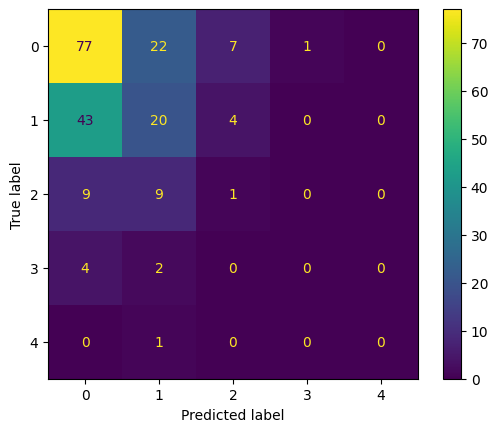

In [12]:
# Confusion matrix on balanced model

cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

plt.show()

##### Plotting the results

Predicted values:
0    133
1     54
2     12
3      1
dtype: int64


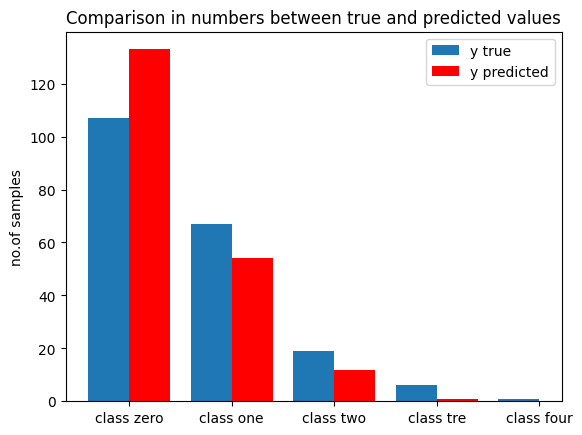

In [28]:
target_names = ['class zero','class one','class two','class tre', 'class four']
y_test = pd.Series(y_test)
y_pred = pd.Series(y_pred)
X_axis = np.arange(len(target_names))
print(f"Predicted values:\n{y_pred.value_counts()}")
X1_axis = np.arange(len(y_pred.value_counts()))

plt.bar(X_axis - 0.2, y_test.value_counts().sort_index(), 0.4, label='y true')
plt.bar(X1_axis + 0.2, y_pred.value_counts().sort_index(),  0.4, label='y predicted', color='red')
plt.xticks(X_axis, target_names)
plt.ylabel('no.of samples')
plt.title('Comparison in numbers between true and predicted values')
plt.legend()
plt.show()

The plot above shows only the frequencies of samples in classes. There is no correlation between y_true and y_predicted about correctness in this plot

##### GridSearch

In [19]:
# GridSearch

grid_search_classification = GridSearchCV(RandomForestClassifier(random_state = random_state, n_jobs=-1),
                                          {'n_estimators': (10,100,200,500),
                                           'criterion':('gini', 'log_loss', "entropy"),
                                           'max_depth':(5,9,None)
                                           }, cv=5, scoring = "f1_macro", n_jobs=-1
)

grid_search_classification.fit(X_train_b, y_train_b)
print("Best classification hyper-parameters: %r" %grid_search_classification.best_params_)
print("Best macro f1 score: %f" %grid_search_classification.best_score_)

Best classification hyper-parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}
Best f1 macro: 0.874310


RandomForest tuned with GridSearch Params

In [31]:
modelGS = RandomForestClassifier(n_estimators=200, max_depth=None, criterion='gini', random_state = random_state, n_jobs=-1)
modelGS.fit(X_train_b, y_train_b)
y_predGS = modelGS.predict(X_test)
print(f"Macro f1 score: {f1_score(y_test, y_predGS, average='macro'):.3f}")
print(f"f1-score: {f1_score(y_test, y_predGS, average=None)}")

Macro f1 score: 0.202
f1-score: [0.62184874 0.32520325 0.06451613 0.         0.        ]


### K-Nearest Neighbors Classifier

#### Pre-processing: Normalization

In [7]:
# Normalization

from sklearn.preprocessing import RobustScaler, StandardScaler

transformer = RobustScaler().fit(X)
X_scaled=transformer.transform(X)

# scaler = StandardScaler().fit(X)
# X_scaled = scaler.transform(X)


# min_max_scaler = preprocessing.MinMaxScaler()
# X_n = min_max_scaler.fit_transform(X)

#### Stratified K-Fold CrossValidation

In [54]:
n_neighbors = 2
model = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform", n_jobs=-1)
skf = StratifiedKFold(n_splits=10, random_state=random_state, shuffle=True)
lst_f1_stratified = []
lst_accu_stratified = []
for train_index, test_index in skf.split(X_scaled, yC): 
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index] 
    y_train_fold, y_test_fold = yC[train_index], yC[test_index] 
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)
    lst_f1_stratified.append(f1_score(y_test_fold, y_pred, average='macro', zero_division=0))
    lst_accu_stratified.append(balanced_accuracy_score(y_test_fold, y_pred))
print('Overall f1-score:', mean(lst_f1_stratified))
print('Overall Balanced accuracy:', mean(lst_accu_stratified))

Overall f1-score: 0.23599222589746313
Overall Balanced accuracy: 0.2511165297069848


c:\Users\gianc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


#### Splitting the dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, yC, test_size = 0.2, random_state = random_state, stratify=yC)

# Stratify will make sure your train and validation data are split based on output label frequencies based on train data

#### Balancing the train split subset

In [9]:
# Oversampling the training subset

class4 ={yC.value_counts().sort_index().index[4]:30}
#         yC.value_counts().sort_index().index[3]:334,
#        yC.value_counts().sort_index().index[2]:334}

ros = RandomOverSampler(random_state=random_state, sampling_strategy=class4)
X_res, y_res = ros.fit_resample(X_train, y_train)

smote = SMOTE(random_state = random_state)

X_train_b, y_train_b = smote.fit_resample(X_res, y_res)

# SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and 
# drawing a new sample as a point along that line.

##### Subsets normalization

In [10]:
# Normalization

transformer = RobustScaler().fit(X_train_b)
X_train_b = transformer.transform(X_train_b)

transformer0 = RobustScaler().fit(X_train)
X_train = transformer0.transform(X_train)

transformer1 = RobustScaler().fit(X_test)
X_test = transformer.transform(X_test)

# min_max_scaler = preprocessing.MinMaxScaler()
# X_train_b = min_max_scaler.fit_transform(X_train_b)
# X_test = min_max_scaler.fit_transform(X_test)

#### K-NN Algorithm

In [21]:
# K-NN

model = neighbors.KNeighborsClassifier(n_jobs=-1)
model.fit(X_train_b, y_train_b)
y_pred = model.predict(X_test)

print(f"Accuracy score on balanced: {accuracy_score(y_test, y_pred):.3f}")

model = neighbors.KNeighborsClassifier(n_jobs=-1)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

print(f"\nBalanced Accuracy score on non-balanced: {balanced_accuracy_score(y_test, y_pred1):.3f}")


# With weights parameter set on "distance", performances decrease in all cases

Accuracy score on balanced: 0.330

Balanced Accuracy score on non-balanced: 0.217


##### Evaluations

In [22]:
# More evaluations

results = f1_score(y_test, y_pred, average=None, zero_division=0)
print("\nf1-scores on balanced:\n")
i=0
for i in range(len(results)):
    print('f1-score for class %d: %f' %(i, results[i]))
print('Macro avg f1-score: %.5f' % f1_score(y_test, y_pred, average='macro', zero_division=0))

results=[]
    
results = f1_score(y_test, y_pred1, average=None, zero_division=0)
print("---------\nf1-scores on non-balanced:\n")
i=0
for i in range(len(results)):
    print('f1-score for class %d: %f' %(i, results[i]))
print('Macro avg f1-score: %.5f' % f1_score(y_test, y_pred1, average='macro', zero_division=0))


f1-scores on balanced:

f1-score for class 0: 0.397260
f1-score for class 1: 0.400000
f1-score for class 2: 0.162162
f1-score for class 3: 0.157895
f1-score for class 4: 0.000000
Macro avg f1-score: 0.22346
---------
f1-scores on non-balanced:

f1-score for class 0: 0.650602
f1-score for class 1: 0.247934
f1-score for class 2: 0.173913
f1-score for class 3: 0.000000
f1-score for class 4: 0.000000
Macro avg f1-score: 0.21449


##### Confusion Matrix

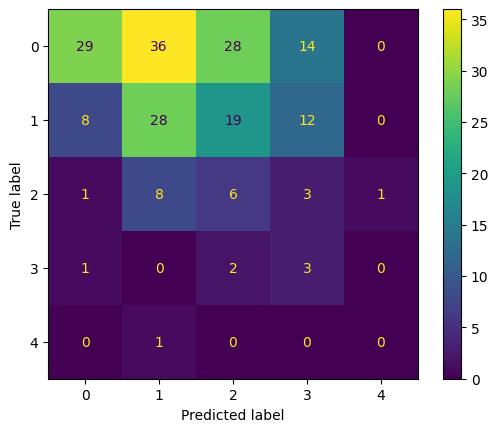

In [23]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

plt.show()

##### Plotting the results

0    39
1    73
2    55
3    32
4     1
dtype: int64


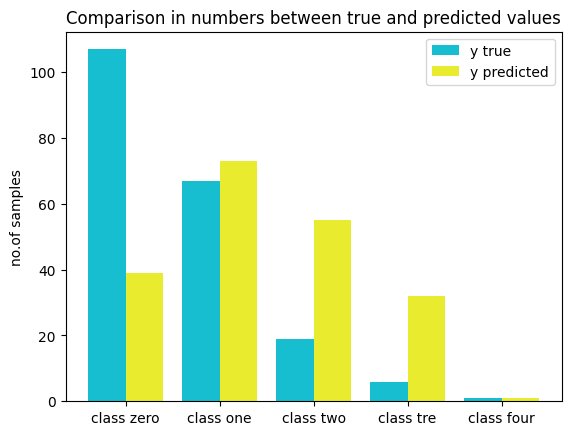

In [24]:
target_names = ['class zero','class one','class two','class tre', 'class four']
y_test = pd.Series(y_test)
y_pred = pd.Series(y_pred)
X_axis = np.arange(len(target_names))
print(y_pred.value_counts().sort_index())

y_test = pd.Series(y_test)
y_pred = pd.Series(y_pred)
plt.bar(X_axis - 0.2, y_test.value_counts().sort_index(), 0.4, label='y true', color='#17becf')
plt.bar(X_axis + 0.2, y_pred.value_counts().sort_index(),  0.4, label='y predicted', color='#e9eb2f')
plt.xticks(X_axis, target_names)
plt.ylabel('no.of samples')
plt.title('Comparison in numbers between true and predicted values')
plt.legend()

plt.show()

The plot above shows only the frequencies of samples in classes. There is no correlation between y_true and y_predicted about correctness in this plot

##### GridSearch

In [25]:
# GridSearch

grid_search_classification = GridSearchCV(neighbors.KNeighborsClassifier(n_jobs=-1),
                                          {'n_neighbors': range(3, 100, 2),
                                           'weights':('uniform', 'distance'),
                                           'algorithm':('ball_tree', 'kd_tree', 'brute')
                                           }, cv=5, scoring = "f1_macro", n_jobs=-1
)

grid_search_classification.fit(X_train_b, y_train_b)
print("Best classification hyper-parameters: %r" %grid_search_classification.best_params_)
print("Best macro f1 score: %f" %grid_search_classification.best_score_)

Best classification hyper-parameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
Best macro f1 score: 0.765081


K-NN tuned with GridSearch Params

In [31]:
modelGS = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='ball_tree', n_jobs=-1)
modelGS.fit(X_train_b, y_train_b)
y_predGS = modelGS.predict(X_test)
print(f"Macro f1 score: {f1_score(y_test, y_predGS, average='macro'):.3f}")
print(f"f1-score: {f1_score(y_test, y_predGS, average=None)}")

Macro f1 score: 0.242
f1-score: [0.47204969 0.3880597  0.17647059 0.17142857 0.        ]


# REGRESSION TASK

### PREPARING THE ENVIRONMENT

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import (confusion_matrix, mean_absolute_error,
                             mean_squared_error, r2_score)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [66]:
dataset = pd.read_csv("train_set.tsv", sep='\t', header=0)
random_state = 2057231

X = dataset.iloc[:,:-2]
yR = dataset.iloc[:,-1]

#X = X.to_numpy()
yR = yR.to_numpy().reshape(-1,1)

#### Pre-processing the data:

Normalization of the dataset

In [67]:
# Standard Normalization

# standard_scaler = preprocessing.StandardScaler()
# X = standard_scaler.fit_transform(X)
# yR = standard_scaler.fit_transform(yR)

# MinMax_Scaler Normalization

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
yR = min_max_scaler.fit_transform(yR)

yR = yR.reshape(-1)

#### Plotting the dataset for regression

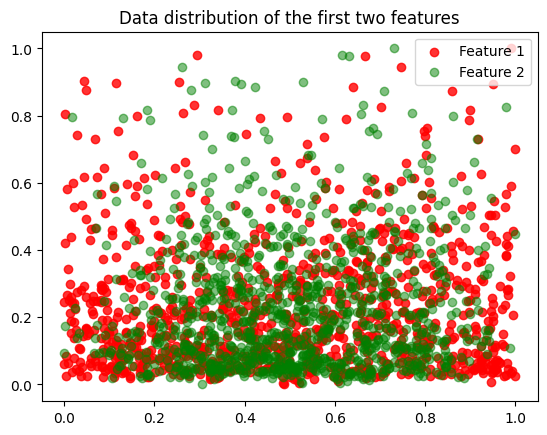

In [36]:
plt.scatter(X[:,0], yR, label='Feature 1', c='red', alpha=0.8)
plt.scatter(X[:,1], yR, label='Feature 2', c='green', alpha=0.5)
plt.title('Data distribution of the first two features')
plt.legend()

plt.show()

#### Splitting the dataset

Step needed for the train and test the models 

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, yR, test_size = 0.333, random_state = random_state)

## Support Vector Regressor

In [97]:
# SVR

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Evaluations

In [98]:
# EVALUATION

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")

print(f'Regression score: {r2_score(y_test, y_pred):.2f}')

Mean squared error: 0.04
Regression score: -0.03


#### Plotting the distances between distributions of the dataset and prediction on feature 1

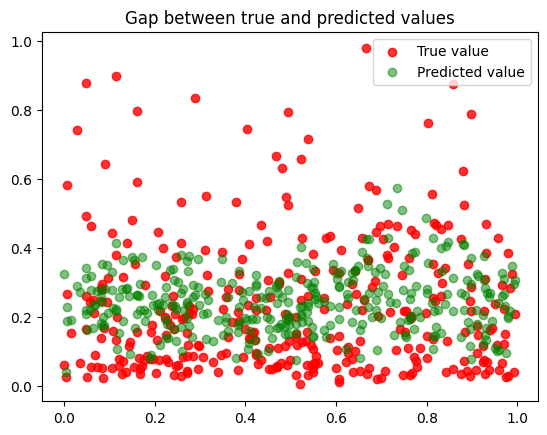

In [99]:
plt.scatter(X_test[:,0], y_test, label='True value', c='red', alpha=0.8)
plt.scatter(X_test[:,0], y_pred, label='Predicted value', c='green', alpha=0.5)
plt.title('Gap between true and predicted values')
plt.legend()

plt.show()

### GridSearch

In [100]:
# GridSearch

grid_search_regression = GridSearchCV(SVR(),
                           {
                            'C':np.arange(0.8,2,0.1),                           
                            'kernel': ('linear', 'rbf','poly','sigmoid'),
                            'gamma': ('scale','auto')
                            },cv=5, scoring="r2", n_jobs=-1
                           )

grid_search_regression.fit(X_train, y_train)
print('\nGridSearch for linear, rbf, poly or sigmoid kernels')
print("Best regression hyper-parameters: %r" %grid_search_regression.best_params_)
print("Best r2 score: %.2f" %grid_search_regression.best_score_)

grid_search_regression = GridSearchCV(SVR(kernel='poly'),
                           {
                            'C':np.arange(0.1,1.5,0.1),                            
                            'degree': np.arange(1,4,1),
                            },cv=5, scoring="r2", n_jobs=-1
                           )

grid_search_regression.fit(X_train, y_train)
print('\nGridSearch for poly kernel')
print("Best regression hyper-parameters: %r" %grid_search_regression.best_params_)
print("Best r2 score: %.2f" %grid_search_regression.best_score_)


GridSearch for linear, rbf, poly or sigmoid kernels
Best regression hyper-parameters: {'C': 0.8, 'gamma': 'scale', 'kernel': 'rbf'}
Best r2 score: 0.01

GridSearch for poly kernel
Best regression hyper-parameters: {'C': 0.1, 'degree': 2}
Best r2 score: -0.01


#### SVM tuned with GridSearch

In [101]:
# SVR

modelGS = SVR(kernel='poly', degree=2, C=0.1, gamma='scale')
modelGS.fit(X_train, y_train)
y_predGS = modelGS.predict(X_test)

# EVALUATION

print(f"Mean squared error: {mean_squared_error(y_test, y_predGS):.2f}")

print(f'Regression score: {r2_score(y_test, y_predGS):.2f}')

Mean squared error: 0.04
Regression score: 0.01


#### Plotting the distances between distributions of the dataset and prediction on feature 1

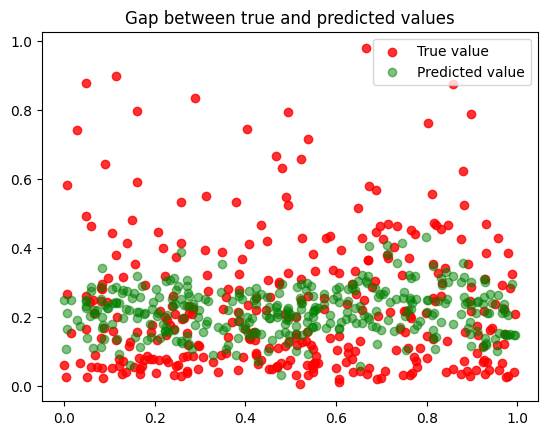

In [102]:
plt.scatter(X_test[:,0], y_test, label='True value', c='red', alpha=0.8)
plt.scatter(X_test[:,0], y_predGS, label='Predicted value', c='green', alpha=0.5)
plt.title('Gap between true and predicted values')
plt.legend()

plt.show()

## K-Nearest Neighbors Regressor

In [86]:
#K-NN

model = KNeighborsRegressor(n_neighbors = 80)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Evaluations

In [87]:
# EVALUATION

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")

print(f'Regression score: {r2_score(y_test, y_pred):.2f}')

Mean squared error: 0.04
Regression score: 0.01


#### Plotting the distances between distributions of the dataset and prediction on feature 1

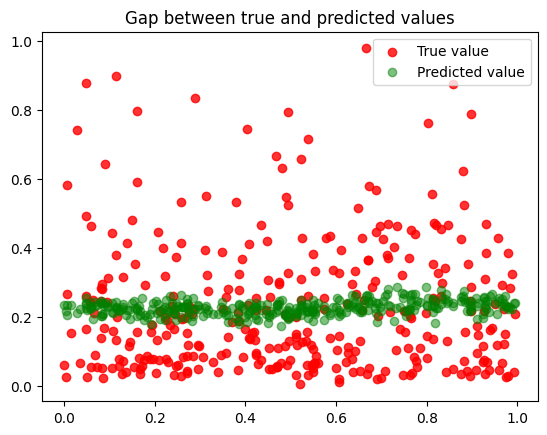

In [88]:
plt.scatter(X_test[:,0], y_test, label='True value', c='red', alpha=0.8)
plt.scatter(X_test[:,0], y_pred, label='Predicted value', c='green', alpha=0.5)
plt.title('Gap between true and predicted values')
plt.legend()

plt.show()

### GridSearch

In [89]:
# GridSearch

grid_search_regression = GridSearchCV(KNeighborsRegressor(),
                           {
                            'n_neighbors':np.arange(1,200,1),                           
                            'weights' : ('uniform', 'distance'),
                            'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute'),
                            },cv=5, scoring="r2", n_jobs=-1
                           )

grid_search_regression.fit(X_train, y_train)
print("Best regression hyper-parameters: %r" %grid_search_regression.best_params_)
print("Best r2 score: %.2f" %grid_search_regression.best_score_)

Best regression hyper-parameters: {'algorithm': 'ball_tree', 'n_neighbors': 39, 'weights': 'distance'}
Best r2 score: 0.03


#### K-NN regressor tuned with GridSearch

In [95]:
# K-NN Regressor

modelGS = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=39, weights='distance')
modelGS.fit(X_train, y_train)
y_predGS = modelGS.predict(X_test)

# EVALUATION

print(f"Mean squared error: {mean_squared_error(y_test, y_predGS):.2f}")

print(f'Regression score: {r2_score(y_test, y_predGS):.2f}')

Mean squared error: 0.03
Regression score: 0.04


#### Plotting the distance between dataset and prediction on feature 1

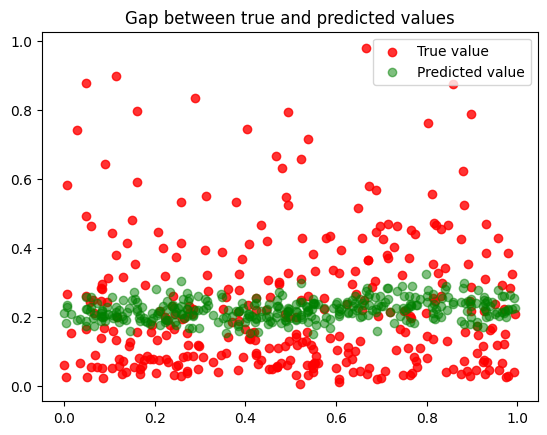

In [96]:
plt.scatter(X_test[:,0], y_test, label='True value', c='red', alpha=0.8)
plt.scatter(X_test[:,0], y_predGS, label='Predicted value', c='green', alpha=0.5)
plt.title('Gap between true and predicted values')
plt.legend()

plt.show()